In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
def kernal(x, y, params, sigma_n):
    diff = np.subtract.outer(x, y)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) * diff**2)
    value[np.where(diff == 0.0)] += sigma_n
    return value

In [4]:
def GP(x_new, x, y, kernal, theta):
    K = kernal(x, x, theta[:-1], theta[-1]) # K
    KS = kernal(x_new, x, theta[:-1], theta[-1]) # K*
    KSS = kernal(x_new, x_new, theta[:-1], theta[-1]) # K**

    y = np.matmul(np.matmul(KS, np.linalg.inv(K)),y)
    var = KSS - KS.dot(np.linalg.inv(K).dot(KS.T))
    var = np.diagonal(var)
    return(y.squeeze(), var.squeeze())

In [5]:
def pretty_plot(fig, axs, xlim=(-15,15), ylim=(-3,3), size=(10,10)):
    plt.ylim(ylim)
    plt.xlim(xlim)
    fig.set_size_inches(size)
    plt.show()

In [6]:
def get_low_and_high(y_bar, var):
    sigma = np.sqrt(var)
    y_low = y_bar - 1.96 * sigma
    y_high = y_bar + 1.96 * sigma
    return y_low, y_high

In [15]:
def optimize_theta(x, y, sigma_n, kernal, params_0=[0.1, 0.1]):
    def log_pY(theta):
        K = np.matrix(kernal(x, x, theta, sigma_n))
        log_k = np.log(np.linalg.norm(K))
        output = 0.5 * np.log(np.matmul(np.matmul(y.T, np.linalg.inv(K)),y))
        output += 0.5 * log_k
        return output

    res = minimize(log_pY, params_0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    return list(res.x) + [sigma_n]

In [8]:
def kernal_2(x, y, params, sigma_n):
    diff = np.subtract.outer(x, y)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) *diff**2)
    value += params[2]**2 * np.exp( -0.5 * (1.0/params[3]**2) *diff**2)
    value[np.where(diff == 0.0)] += sigma_n
    return value

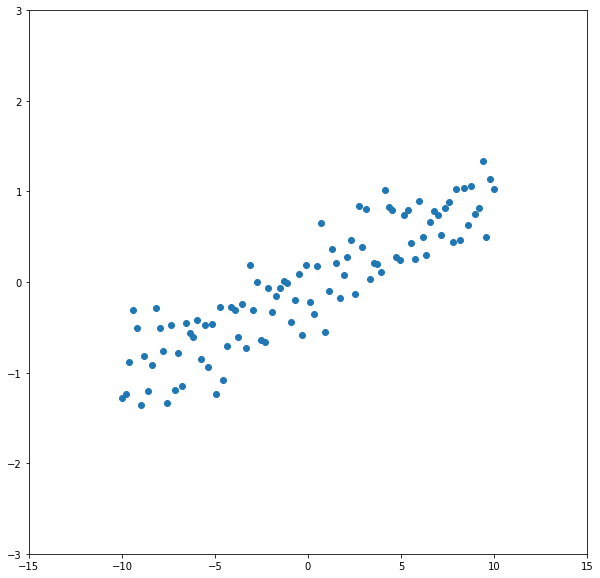

In [9]:
x = np.linspace(-10, 10, 100)
y = 0.1 * x + 0.3 * np.random.normal(0,1,len(x))

fig, axs = plt.subplots(1, 1)
axs.scatter(x, y)
pretty_plot(fig, axs)

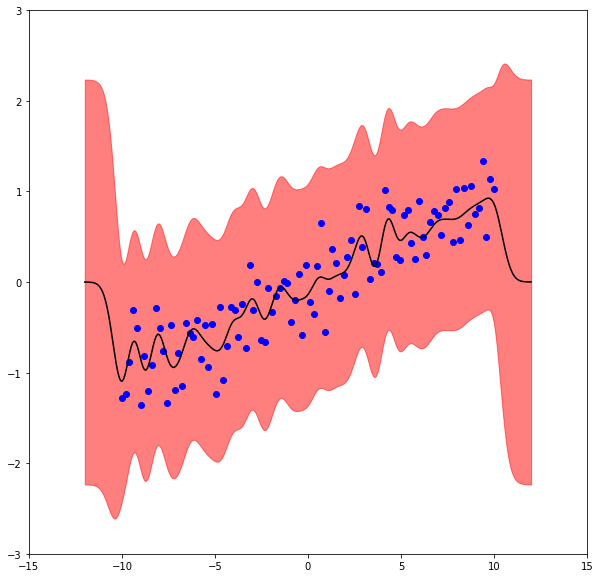

In [11]:
x_new = np.linspace(-12, 12, 300)
sigma_n = 0.3
theta = [1, .5, sigma_n]
y_bar, var = GP(x_new, x, y, kernal, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
axs.scatter(x, y, color='b')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)

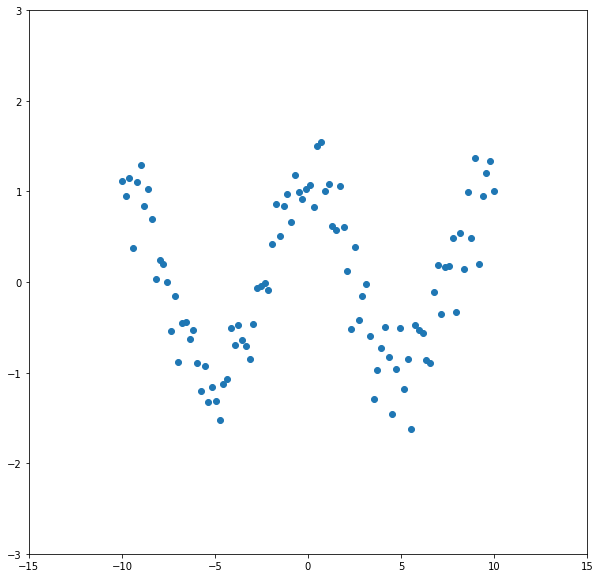

In [12]:
x = np.linspace(-10, 10, 100)
y = np.cos(np.pi/5 * x) + 0.3 * np.random.normal(0,1,len(x))

fig, axs = plt.subplots(1, 1)
axs.scatter(x, y)
pretty_plot(fig, axs)

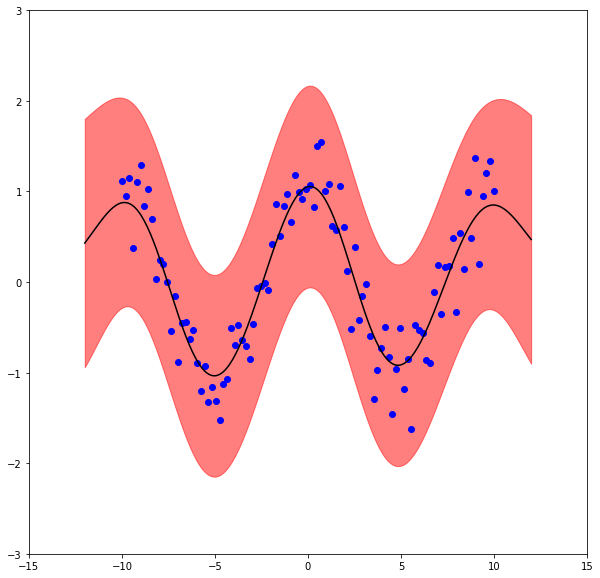

In [13]:
x_new = np.linspace(-12, 12, 300)
sigma_n = 0.3
theta = [0.5, 2, sigma_n]
y_bar, var = GP(x_new, x, y, kernal, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
axs.scatter(x, y, color='b')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)

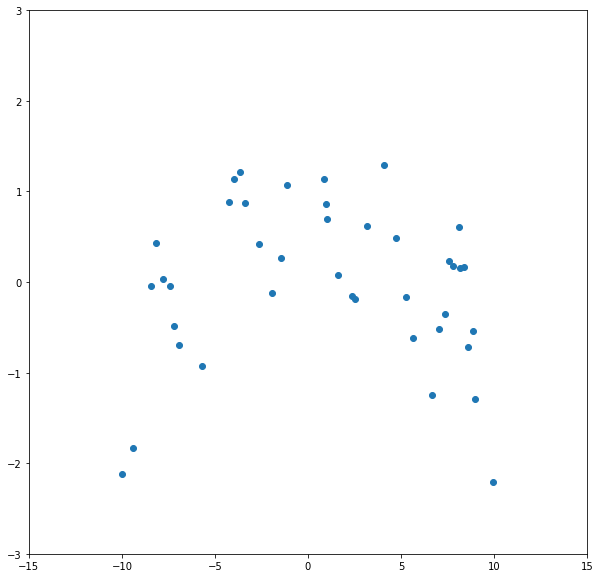

In [14]:
x = np.linspace(-10, 10, 300)
np.random.shuffle(x)
x = x[0:40]
x.sort()
y = np.cos(np.pi/10 * x) + np.cos(np.pi/2 * x) + 0.2 * np.random.normal(0,1,len(x))

fig, axs = plt.subplots(1, 1)
axs.scatter(x, y)
pretty_plot(fig, axs)

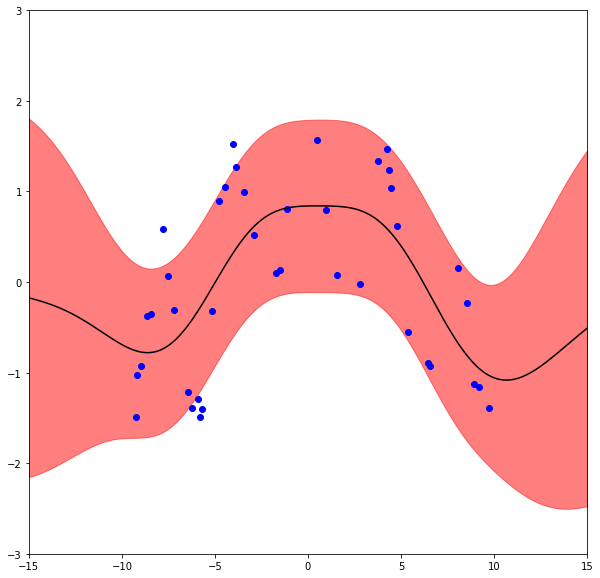

In [12]:
x_new = np.linspace(-15, 15, 300)
sigma_n = 0.2
theta = [1, 4, sigma_n]
y_bar, var = GP(x_new, x, y, kernal, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
axs.scatter(x, y, color='b')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)

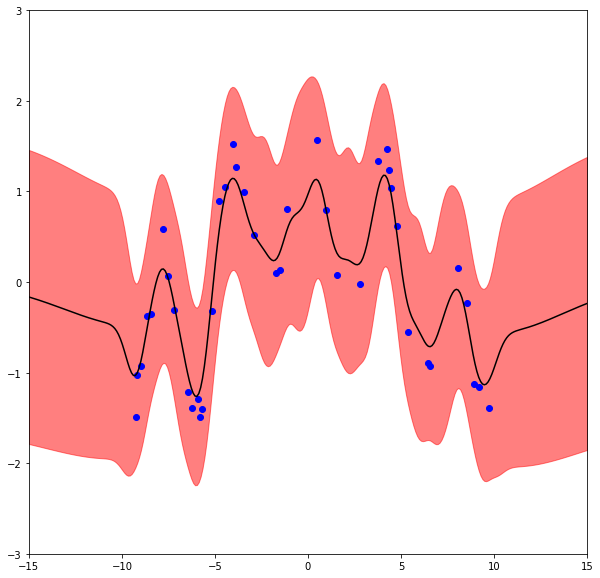

In [13]:
x_new = np.linspace(-15, 15, 300)
sigma_n = 0.2
theta = [0.5, 4, 0.5, 0.5, sigma_n]
y_bar, var = GP(x_new, x, y, kernal_2, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
axs.scatter(x, y, color='b')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)

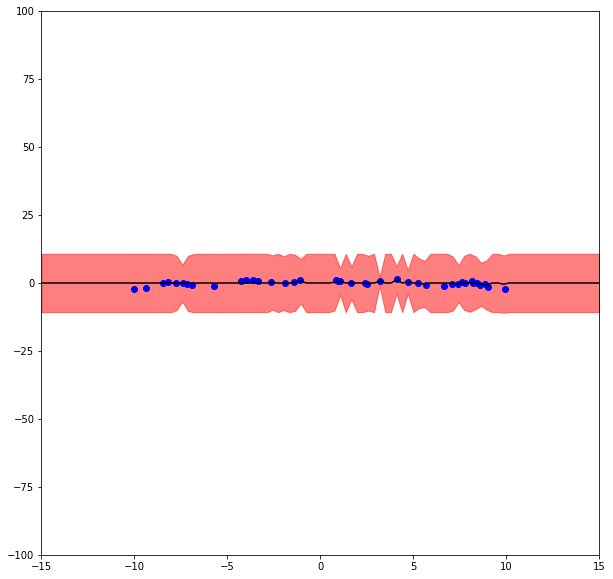

In [17]:
theta = optimize_theta(x, y, 0.2, kernal)
x_new = np.linspace(-15, 15, 100)
y_bar, var = GP(x_new, x, y, kernal, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
axs.scatter(x, y, color='b')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs, ylim=(-100,100))

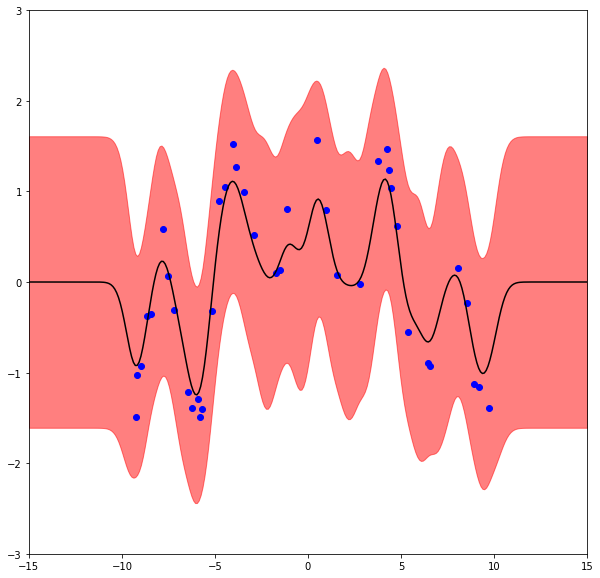

In [15]:
theta = optimize_theta(x, y, 0.3, kernal_2, params_0=[1, 1, 0.33, 20])
x_new = np.linspace(-15, 15, 300)
y_bar, var = GP(x_new, x, y, kernal_2, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
axs.scatter(x, y, color='b')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)